## Install necessary libraries

In [ ]:
#no installation needed

## Importing libraries


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#import dataset
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/ITC508_data/data_supervised.csv')
#check the first 5 instances
#df.head()

# Text Representation Methods
# ----------------------------------------------
## 1. Dictionary Lookup
## 2. One-Hot Encoding
## 3. Bag-of-Words
## 4. TF-IDF


# ---------------------------------------------------

# Dictionary Lookup

In [2]:
sentences = ["The quick brown fox jumps over the lazy dog",
        "A journey of a thousand miles begins with a single step",
        "To be or not to be that is the question"]
sentences

['The quick brown fox jumps over the lazy dog',
 'A journey of a thousand miles begins with a single step',
 'To be or not to be that is the question']

In [3]:
def extract_words(sentences):
    """
    Extracts unique words from a list of sentences and assigns each a numeric ID.
    Args:
        sentences (list of str): A list of sentences.
    Returns:
        dict: A dictionary with numeric IDs as keys and words as values.
    """
    # Split sentences into words and use a set to keep unique words
    unique_words = set()
    for sentence in sentences:
        words = sentence.split()
        unique_words.update(words)

    # Create a dictionary with incrementing numeric IDs as keys
    word_dict = {i: word for i, word in enumerate(unique_words)}

    return word_dict



In [4]:
print("Extracted words with their numeric ID")
word_dict = extract_words(sentences)
word_dict

Extracted words with their numeric ID


{0: 'the',
 1: 'be',
 2: 'not',
 3: 'of',
 4: 'The',
 5: 'fox',
 6: 'quick',
 7: 'journey',
 8: 'to',
 9: 'To',
 10: 'step',
 11: 'question',
 12: 'lazy',
 13: 'dog',
 14: 'jumps',
 15: 'thousand',
 16: 'with',
 17: 'single',
 18: 'is',
 19: 'begins',
 20: 'A',
 21: 'miles',
 22: 'over',
 23: 'that',
 24: 'brown',
 25: 'or',
 26: 'a'}

In [20]:
def lookup_by_id(word_dict, numeric_id):
    # Iterate through the dictionary to find the word
    for id, dict_word in word_dict.items():
        if int(numeric_id) == id:
            return f"The numeric id '{numeric_id}' is used to identify the word: {dict_word}"
    return f"The ID '{numeric_id}' was not found in the dictionary."

def lookup_by_word(word_dict, word):
    # Iterate through the dictionary to find the word
    for id, dict_word in word_dict.items():
        if dict_word == word:
            return f"The word '{word}' has the numeric ID: {id}"

    return f"The word '{word}' was not found in the dictionary."

In [22]:
 while True:
  user_input = input("Enter look up key (or 'exit' to quit): ").strip()

  if user_input.lower() == 'exit':
    print("Exiting the program.")
    break

  result = lookup_by_id(word_dict, user_input)
  print(f"Result: {result}\n")

Enter look up key (or 'exit' to quit): 1
Result: The numeric id '1' is used to identify the word: be

Enter look up key (or 'exit' to quit): exit
Exiting the program.


# One-Hot Encoding

In [23]:
import numpy as np

In [24]:
sentences = ["The cat in the hat",
"The dog in the house"]
token_index = {}
counter = 0

for sentence in sentences:
  for considered_word in sentence.split():
    if considered_word not in token_index:
      token_index.update({considered_word : counter + 1})
      counter = counter + 1

print(token_index)

{'The': 1, 'cat': 2, 'in': 3, 'the': 4, 'hat': 5, 'dog': 6, 'house': 7}


In [25]:
max_length = 6
results  = np.zeros(shape = (len(sentences),
                            max_length,
                            max(token_index.values()) + 1))
print("Initial Vectors")
results

Initial Vectors


array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

In [26]:
for i, sentence in enumerate(sentences):
  for j, considered_word in list(enumerate(sentence.split())):
    index = token_index.get(considered_word)
    print(i,j, sentence, index, considered_word)
    print(results[i,j])
    results[i, j, index] = 1

0 0 The cat in the hat 1 The
[0. 0. 0. 0. 0. 0. 0. 0.]
0 1 The cat in the hat 2 cat
[0. 0. 0. 0. 0. 0. 0. 0.]
0 2 The cat in the hat 3 in
[0. 0. 0. 0. 0. 0. 0. 0.]
0 3 The cat in the hat 4 the
[0. 0. 0. 0. 0. 0. 0. 0.]
0 4 The cat in the hat 5 hat
[0. 0. 0. 0. 0. 0. 0. 0.]
1 0 The dog in the house 1 The
[0. 0. 0. 0. 0. 0. 0. 0.]
1 1 The dog in the house 6 dog
[0. 0. 0. 0. 0. 0. 0. 0.]
1 2 The dog in the house 3 in
[0. 0. 0. 0. 0. 0. 0. 0.]
1 3 The dog in the house 4 the
[0. 0. 0. 0. 0. 0. 0. 0.]
1 4 The dog in the house 7 house
[0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
list(enumerate(sentence.split()))

[(0, 'The'), (1, 'dog'), (2, 'in'), (3, 'the'), (4, 'house')]

In [28]:
for j, considered_word in list(enumerate(sentence.split())):
  print(j, considered_word)

0 The
1 dog
2 in
3 the
4 house


In [29]:
print("Final Vector Representations:")
results

Final Vector Representations:


array([[[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

# Bag-of-Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# Sample sentences
sentences = ["The cat in the hat",
"The dog in the house", "The bird in the sky"]
# Create a CountVectorizer object
vectorizer = CountVectorizer()
# Use the fit_transform method to transform the sentences into a bag of words
bow = vectorizer.fit_transform(sentences)
# Print the sentences in the corpus
print("Sentences processed: "+str(sentences)+"\n")
# Print the vocabulary (features) of the bag of words
print("Unique Words in the corpus: "+str(list(vectorizer.vocabulary_.keys())))
print("\nBag of Words Conversion:")
print(vectorizer.get_feature_names_out())
# Print the bag of words
print(bow.toarray())

Sentences processed: ['The cat in the hat', 'The dog in the house', 'The bird in the sky']

Unique Words in the corpus: ['the', 'cat', 'in', 'hat', 'dog', 'house', 'bird', 'sky']

Bag of Words Conversion:
['bird' 'cat' 'dog' 'hat' 'house' 'in' 'sky' 'the']
[[0 1 0 1 0 1 0 2]
 [0 0 1 0 1 1 0 2]
 [1 0 0 0 0 1 1 2]]


### TF-IDF
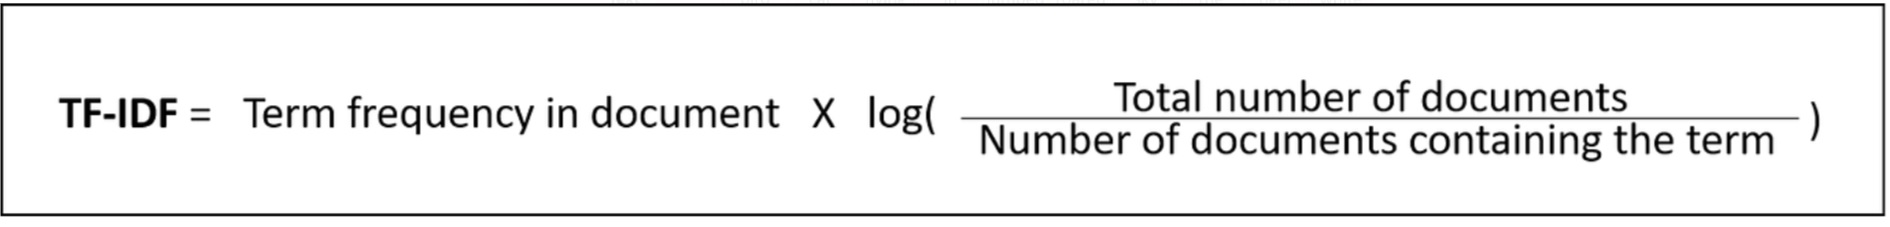

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
documents = ["This is the first document.",
              "This document is the second document.",
              "And this is the third one."]

In [34]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

In [35]:
print("Final Text Representation:")
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", X_tfidf.toarray())

Final Text Representation:
Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF Matrix:
 [[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]
